In [4]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

household = pd.read_csv("data/clean/household.csv")
household["travel_day_date"] = pd.to_datetime(household["travel_day_date"])

label_encoder = LabelEncoder()
scaler = MinMaxScaler()
for col in household.columns.drop('count_household_trips'):
  if household[col].dtype == object:
    household[col] = label_encoder.fit_transform(household[col])
  else: # Normalize
    household[col] = scaler.fit_transform(household[col].values.reshape(-1, 1))


target = household["count_household_trips"].to_numpy()
features = household.drop('count_household_trips', axis=1).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(6314, 34)
(1579, 34)
(6314,)
(1579,)


Epoch 1/500
102/102 [==============================] - 2s 9ms/step - loss: 20.9042 - val_loss: 18.7931
Epoch 2/500
102/102 [==============================] - 1s 7ms/step - loss: 17.6616 - val_loss: 28.4122
Epoch 3/500
102/102 [==============================] - 1s 7ms/step - loss: 16.2780 - val_loss: 18.3794
Epoch 4/500
102/102 [==============================] - 0s 4ms/step - loss: 15.6174 - val_loss: 14.6461
Epoch 5/500
102/102 [==============================] - 0s 4ms/step - loss: 15.1389 - val_loss: 19.9794
Epoch 6/500
102/102 [==============================] - 0s 4ms/step - loss: 14.9291 - val_loss: 17.2828
Epoch 7/500
102/102 [==============================] - 0s 4ms/step - loss: 14.5611 - val_loss: 17.1033
Epoch 8/500
102/102 [==============================] - 0s 4ms/step - loss: 14.6978 - val_loss: 16.9127
Epoch 9/500
102/102 [==============================] - 0s 4ms/step - loss: 14.3236 - val_loss: 34.3742
Epoch 10/500
102/102 [==============================] - 0s 4ms/step - los

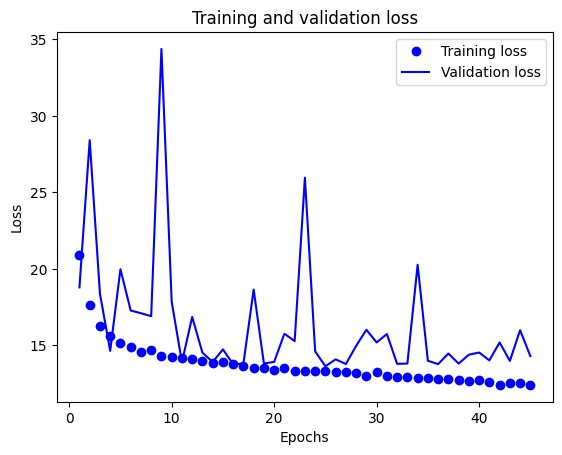

In [5]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(1, activation='linear', kernel_regularizer=keras.regularizers.l2(0.01))
])


model.compile(optimizer="RMSprop", loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=[callback], batch_size=50)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


50/50 [==============================] - 0s 2ms/step
Train error:
198/198 [==============================] - 0s 2ms/step
4.765925154696259
Test error:
4.690206038241473


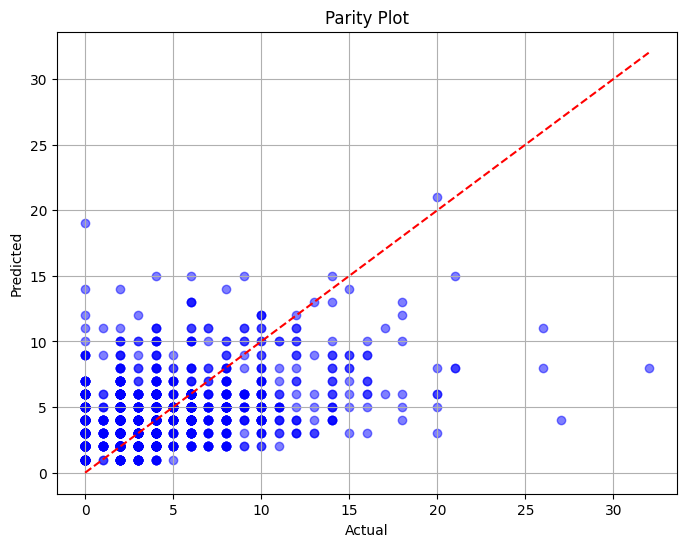

In [7]:
preds = model.predict(x_test)
preds = np.round(preds).astype(int)
print("Train error:")
print(np.sqrt(np.mean((y_test-np.round(model.predict(x_train)).astype(int))**2)))
print("Test error:")
print(np.sqrt(np.mean((y_test-preds)**2)))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Parity Plot')
plt.grid(True)
plt.show()

In [8]:

household = pd.read_csv("data/clean/household.csv")
person = pd.read_csv("data/clean/person.csv")
for col in person:
  if col == "household_id":
    continue
  if col in household.columns:
    person = person.drop(col, axis=1)

merged = pd.merge(household, person, on="household_id", suffixes=('', ''))
merged["travel_day_date"] = pd.to_datetime(merged["travel_day_date"])

label_encoder = LabelEncoder()
scaler = MinMaxScaler()
for col in merged.columns.drop('count_person_trips'):
  if merged[col].dtype == object:
    merged[col] = label_encoder.fit_transform(merged[col])
  else: # Normalize
    merged[col] = scaler.fit_transform(merged[col].values.reshape(-1, 1))


target = merged["count_person_trips"].to_numpy()
features = merged.drop('count_person_trips', axis=1).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(13597, 139)
(3400, 139)
(13597,)
(3400,)


Epoch 1/500
218/218 [==============================] - 2s 5ms/step - loss: 6.0726 - accuracy: 0.2160 - val_loss: 5.1600 - val_accuracy: 0.2165
Epoch 2/500
218/218 [==============================] - 1s 4ms/step - loss: 3.3294 - accuracy: 0.2795 - val_loss: 2.7317 - val_accuracy: 0.2846
Epoch 3/500
218/218 [==============================] - 1s 4ms/step - loss: 2.8517 - accuracy: 0.2988 - val_loss: 2.9516 - val_accuracy: 0.2647
Epoch 4/500
218/218 [==============================] - 1s 4ms/step - loss: 2.6474 - accuracy: 0.3088 - val_loss: 2.8814 - val_accuracy: 0.2787
Epoch 5/500
218/218 [==============================] - 1s 4ms/step - loss: 2.5392 - accuracy: 0.3198 - val_loss: 2.5073 - val_accuracy: 0.2908
Epoch 6/500
218/218 [==============================] - 1s 4ms/step - loss: 2.4508 - accuracy: 0.3248 - val_loss: 2.2780 - val_accuracy: 0.3482
Epoch 7/500
218/218 [==============================] - 1s 4ms/step - loss: 2.3949 - accuracy: 0.3301 - val_loss: 2.1587 - val_accuracy: 0.3669

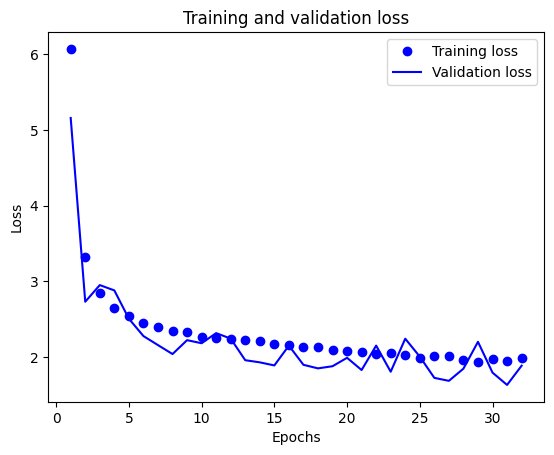

In [9]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(1, activation='linear', kernel_regularizer=keras.regularizers.l2(0.01))
])


model.compile(optimizer="RMSprop", loss='mean_squared_error', metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=[callback], batch_size=50)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


107/107 [==============================] - 0s 2ms/step
Train error:
425/425 [==============================] - 1s 2ms/step
2.308101511272936
Test error:
2.299869335840129


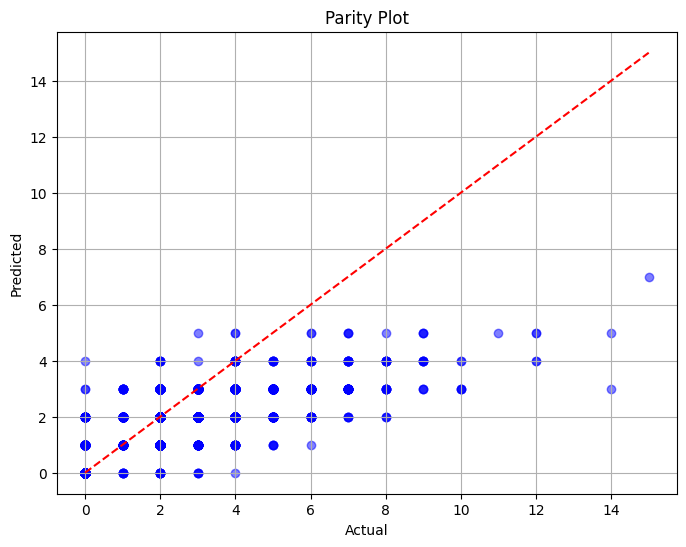

In [10]:
preds = model.predict(x_test)
preds = np.round(preds).astype(int)
print("Train error:")
print(np.sqrt(np.mean((y_test-np.round(model.predict(x_train)).astype(int))**2)))
print("Test error:")
print(np.sqrt(np.mean((y_test-preds)**2)))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Parity Plot')
plt.grid(True)
plt.show()